In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/cleaned_diabetes_data.csv')

In [3]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
corr = df.corr()

In [8]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.122663,0.210887,0.075722,0.026892,0.015468,-0.039252,0.544302,0.217377
Glucose,0.122663,1.000000,0.219258,0.190674,0.420531,0.229373,0.135739,0.265391,0.491552
BloodPressure,0.210887,0.219258,1.000000,0.192179,0.045353,0.281585,-0.002337,0.325255,0.165982
SkinThickness,0.075722,0.190674,0.192179,1.000000,0.156352,0.542218,0.100540,0.124301,0.212976
Insulin,0.026892,0.420531,0.045353,0.156352,1.000000,0.180926,0.127021,0.097666,0.204602
BMI,0.015468,0.229373,0.281585,0.542218,0.180926,1.000000,0.152025,0.023765,0.310533
DiabetesPedigreeFunction,-0.039252,0.135739,-0.002337,0.100540,0.127021,0.152025,1.000000,0.032022,0.172320
Age,0.544302,0.265391,0.325255,0.124301,0.097666,0.023765,0.032022,1.000000,0.236771
Outcome,0.217377,0.491552,0.165982,0.212976,0.204602,0.310533,0.172320,0.236771,1.000000


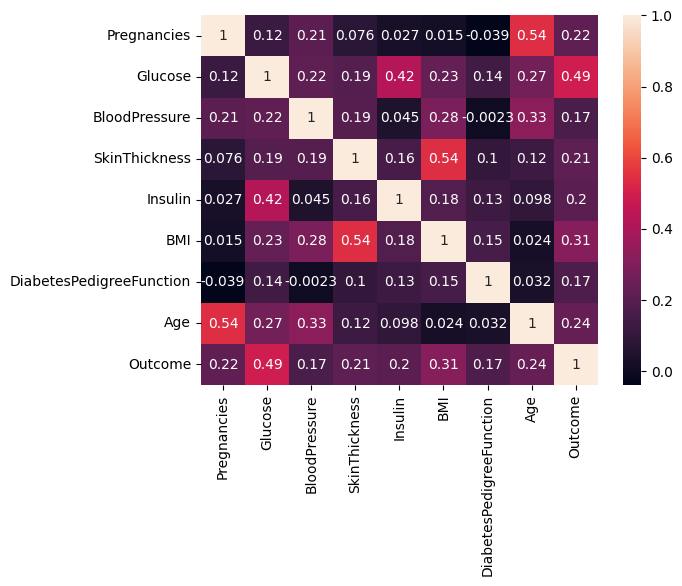

In [9]:
sns.heatmap(corr , annot = True)
plt.show()

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
##independent and dependent feature
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [13]:
y

0      1
1      0
2      1
3      0
4      1
      ..
762    0
763    0
764    0
765    1
766    0
Name: Outcome, Length: 767, dtype: int64

In [14]:
##train test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\khatr\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [17]:
X_train

array([[ 2.44113813, -1.0967839 ,  0.14015046, ...,  0.41901843,
        -0.27335981,  1.23799575],
       [ 0.05953995,  0.26459558,  1.11009844, ...,  0.38987593,
        -0.71452791, -0.87531489],
       [-0.83355936, -1.03037514, -0.82979753, ..., -0.76125271,
         0.33287118, -0.79078247],
       ...,
       [-0.53585959, -0.43269635, -0.82979753, ..., -1.05267769,
        -1.02364569, -1.04437975],
       [ 2.44113813,  0.62984373,  1.02926944, ...,  0.72501465,
        -0.67551304,  0.64626877],
       [-1.13125913,  0.13177807,  1.91838843, ..., -1.4461014 ,
        -0.62149246, -1.04437975]], shape=(575, 8))

In [23]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [24]:
reg.fit(X_train , y_train)

LogisticRegression()

In [25]:
y_pred = reg.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.3541666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       124
           1       0.35      1.00      0.52        68

    accuracy                           0.35       192
   macro avg       0.18      0.50      0.26       192
weighted avg       0.13      0.35      0.19       192

Confusion Matrix:
 [[  0 124]
 [  0  68]]


In [28]:
print(y_train.value_counts())


Outcome
0    376
1    199
Name: count, dtype: int64


In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [30]:
(df ==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports L1 and L2
}

# Set up the model
model = LogisticRegression()

# Set up GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# Predict with best estimator
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7704347826086957


In [35]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
##with open('logistic_model.pkl', 'wb') as file:
    ##pickle.dump(model, file)
